# importing libraries 

#Data of road accidents that occurred during January 2021. It includes information such as the accident date, day of the week, junction control, accident severity, geographical coordinates, lighting and weather conditions, vehicle details, and more. The data is valuable for analyzing and understanding the factors contributing to road accidents in this urban area, aiding in the development of strategies for improved road safety. Accident_Index: A unique identifier for each accident record.

Accident Date: The date on which the accident occurred (format: DD/MM/YYYY).

Day_of_Week: The day of the week when the accident took place.

Junction_Control : Describes the type of junction control at the accident location (e.g., "Give way or uncontrolled").

Junction_Detail: Provides additional details about the junction where the accident occurred (e.g., "T or staggered junction").

Accident_Severity: Indicates the severity of the accident (e.g., "Serious").

Latitude: The geographic latitude of the accident location.

Light_Conditions: Describes the lighting conditions at the time of the accident (e.g., "Daylight").

Local_Authority_(District): The local authority district where the accident occurred.

Carriageway_Hazards: Describes any hazards present on the carriageway at the time of the accident (e.g., "None") Longitude: The geographic longitude of the accident location.

Number_of_Casualties: The total number of casualties involved in the accident.

Number_of_Vehicles: The total number of vehicles involved in the accident.

Police_Force: The police force that handled the accident.

Road_Surface_Conditions: Describes the surface conditions of the road at the time of the accident (e.g., "Dry").

Road_Type: Specifies the type of road where the accident occurred (e.g., "One way street").

Speed_limit: The speed limit applicable to the road where the accident occurred.

Time: The time of day when the accident happened (format: HH:MM).

Urban_or_Rural_Area: Indicates whether the accident occurred in an urban or rural area.

Weather_Conditions: Describes the weather conditions at the time of the accident (e.g., "Fine no high winds").

Vehicle_Type: Specifies the type of vehicle involved in the accident (e.g., "Car," "Taxi/Private hire car").


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
df=pd.read_csv('E:/Luminar Project/Road Accident Data  (1).csv')
df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,01-05-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,01-04-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,01-05-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,01-06-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156041,2.01E+12,3/16/2021,Monday,Give way or uncontrolled,Private drive or entrance,Serious,55.957623,Daylight,"Edinburgh, City of",NaN,...,1,2,Lothian and Borders,Dry,NaN,30,17:00,Urban,Fine no high winds,Car
156042,2.01E+12,3/21/2021,Saturday,Data missing or out of range,Not at junction or within 20 metres,Slight,55.976706,Darkness - lights lit,"Edinburgh, City of",NaN,...,1,1,Lothian and Borders,Dry,Single carriageway,30,22:20,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under
156043,2.01E+12,3/23/2021,Monday,Give way or uncontrolled,Roundabout,Slight,55.934346,Darkness - lights lit,West Lothian,NaN,...,1,2,Lothian and Borders,Wet or damp,Single carriageway,50,04:19,Urban,Raining + high winds,Car
156044,2.01E+12,3/22/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,55.843925,Darkness - lighting unknown,Midlothian,NaN,...,2,2,Lothian and Borders,Dry,Single carriageway,40,18:00,Rural,Fine no high winds,Car


In [2]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,01-05-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,01-04-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,01-05-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,01-06-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [3]:
df.tail()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
156041,2.01E+12,3/16/2021,Monday,Give way or uncontrolled,Private drive or entrance,Serious,55.957623,Daylight,"Edinburgh, City of",NaN,...,1,2,Lothian and Borders,Dry,NaN,30,17:00,Urban,Fine no high winds,Car
156042,2.01E+12,3/21/2021,Saturday,Data missing or out of range,Not at junction or within 20 metres,Slight,55.976706,Darkness - lights lit,"Edinburgh, City of",NaN,...,1,1,Lothian and Borders,Dry,Single carriageway,30,22:20,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under
156043,2.01E+12,3/23/2021,Monday,Give way or uncontrolled,Roundabout,Slight,55.934346,Darkness - lights lit,West Lothian,NaN,...,1,2,Lothian and Borders,Wet or damp,Single carriageway,50,04:19,Urban,Raining + high winds,Car
156044,2.01E+12,3/22/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,55.843925,Darkness - lighting unknown,Midlothian,NaN,...,2,2,Lothian and Borders,Dry,Single carriageway,40,18:00,Rural,Fine no high winds,Car
156045,2.01E+12,3/21/2021,Saturday,Data missing or out of range,Not at junction or within 20 metres,Slight,55.932642,Darkness - lights lit,East Lothian,NaN,...,1,1,Lothian and Borders,Dry,Single carriageway,30,23:50,Rural,Fine no high winds,Car


In [4]:
df.dtypes

Accident_Index                 object
Accident Date                  object
Day_of_Week                    object
Junction_Control               object
Junction_Detail                object
Accident_Severity              object
Latitude                      float64
Light_Conditions               object
Local_Authority_(District)     object
Carriageway_Hazards            object
Longitude                     float64
Number_of_Casualties            int64
Number_of_Vehicles              int64
Police_Force                   object
Road_Surface_Conditions        object
Road_Type                      object
Speed_limit                     int64
Time                           object
Urban_or_Rural_Area            object
Weather_Conditions             object
Vehicle_Type                   object
dtype: object

In [5]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,156046.000000,156046.000000,156046.000000,156046.000000,156046.000000
mean,52.467019,-1.335679,1.361637,1.832325,38.966971
std,1.326516,1.311158,0.818911,0.716225,14.067732
min,49.914488,-7.497461,1.000000,1.000000,10.000000
25%,51.482528,-2.222789,1.000000,1.000000,30.000000
50%,52.225702,-1.352238,1.000000,2.000000,30.000000
75%,53.405822,-0.209093,1.000000,2.000000,50.000000
max,60.598055,1.757915,48.000000,32.000000,70.000000


In [6]:
df.isna().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           153287
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          152
Road_Type                        840
Speed_limit                        0
Time                              13
Urban_or_Rural_Area                0
Weather_Conditions              3284
Vehicle_Type                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156046 entries, 0 to 156045
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              156046 non-null  object 
 1   Accident Date               156046 non-null  object 
 2   Day_of_Week                 156046 non-null  object 
 3   Junction_Control            156046 non-null  object 
 4   Junction_Detail             156046 non-null  object 
 5   Accident_Severity           156046 non-null  object 
 6   Latitude                    156046 non-null  float64
 7   Light_Conditions            156046 non-null  object 
 8   Local_Authority_(District)  156046 non-null  object 
 9   Carriageway_Hazards         2759 non-null    object 
 10  Longitude                   156046 non-null  float64
 11  Number_of_Casualties        156046 non-null  int64  
 12  Number_of_Vehicles          156046 non-null  int64  
 13  Police_Force  

# Data visualization

Text(0, 0.5, '')

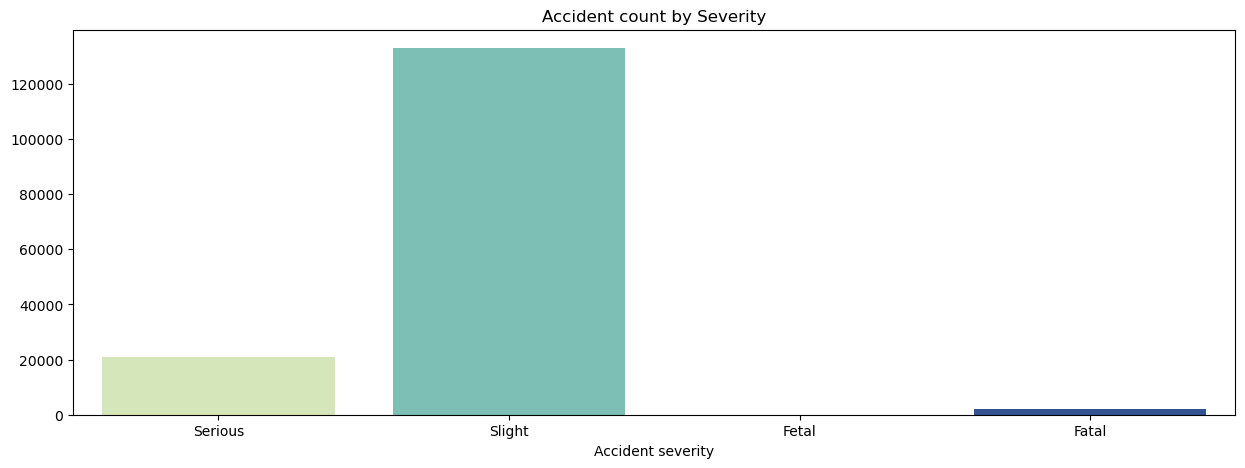

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x='Accident_Severity',palette ='YlGnBu')
plt.title('Accident count by Severity')
plt.xlabel('Accident severity')
plt.ylabel('')

from the above graph it is clear that most of the time the accident severity will be slight

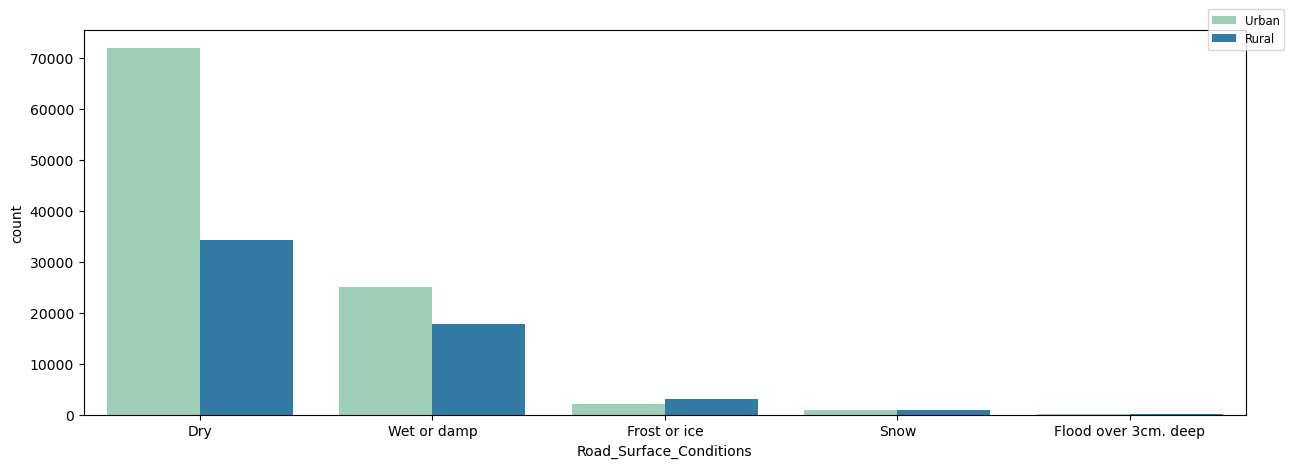

In [9]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='Road_Surface_Conditions', palette="YlGnBu", hue='Urban_or_Rural_Area')
plt.legend(bbox_to_anchor=(1, 1), loc='center', fontsize='small')

 most of tyhe accidents are happening when the road surface condition is dry and in urba areas

Text(0, 0.5, ' ')

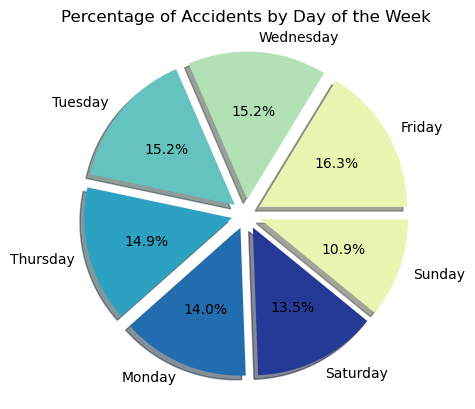

In [10]:
df['Day_of_Week'].value_counts().plot(kind='pie', autopct='%0.1f%%', explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], shadow=True, colors=sns.color_palette("YlGnBu"))
plt.title('Percentage of Accidents by Day of the Week')
plt.ylabel(' ')

accidents are happening equally in every day but friday is slightly higher compare to others

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Authorised person'),
  Text(1, 0, 'Auto traffic sigl'),
  Text(2, 0, 'Auto traffic signal'),
  Text(3, 0, 'Data missing or out of range'),
  Text(4, 0, 'Give way or uncontrolled'),
  Text(5, 0, 'Not at junction or within 20 metres'),
  Text(6, 0, 'Stop sign')])

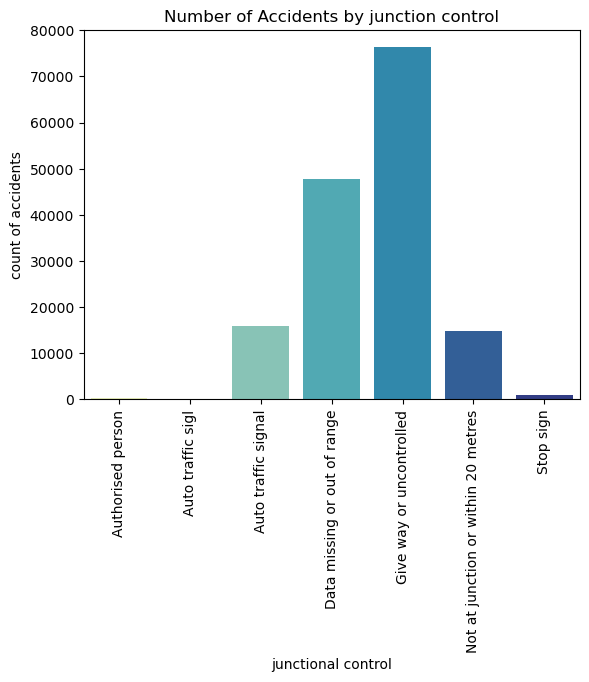

In [11]:
df_sorted = df.sort_values(by='Junction_Control')
sns.countplot(data=df_sorted, x='Junction_Control',palette="YlGnBu")
plt.title('Number of Accidents by junction control')
plt.xlabel('junctional control')
plt.ylabel('count of accidents')
plt.xticks(rotation =90)

most of the accidents are happening where giveway or uncontrolled junctional control are there

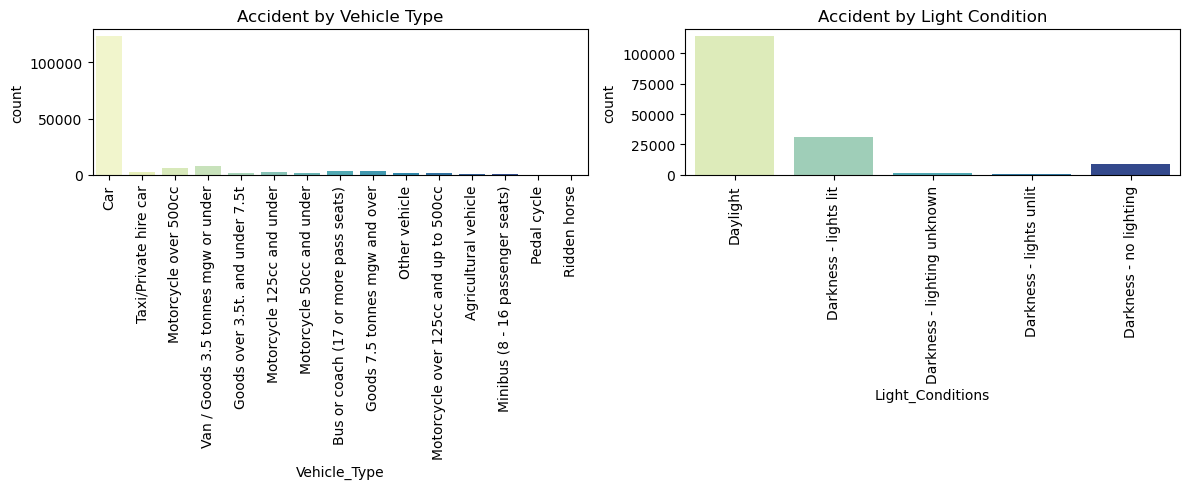

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="Vehicle_Type", palette="YlGnBu")
plt.title('Accident by Vehicle Type')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="Light_Conditions", palette="YlGnBu")
plt.title('Accident by Light Condition')
plt.xticks(rotation=90)
# Adjust layout to prevent overlapping
plt.tight_layout()

car is the vehicle type that are getting into more accidents

In [13]:
count=df['Accident_Severity'].value_counts()
count

Accident_Severity
Slight     132995
Serious     20756
Fatal        2246
Fetal          49
Name: count, dtype: int64

Text(0, 0.5, 'Speed Limit')

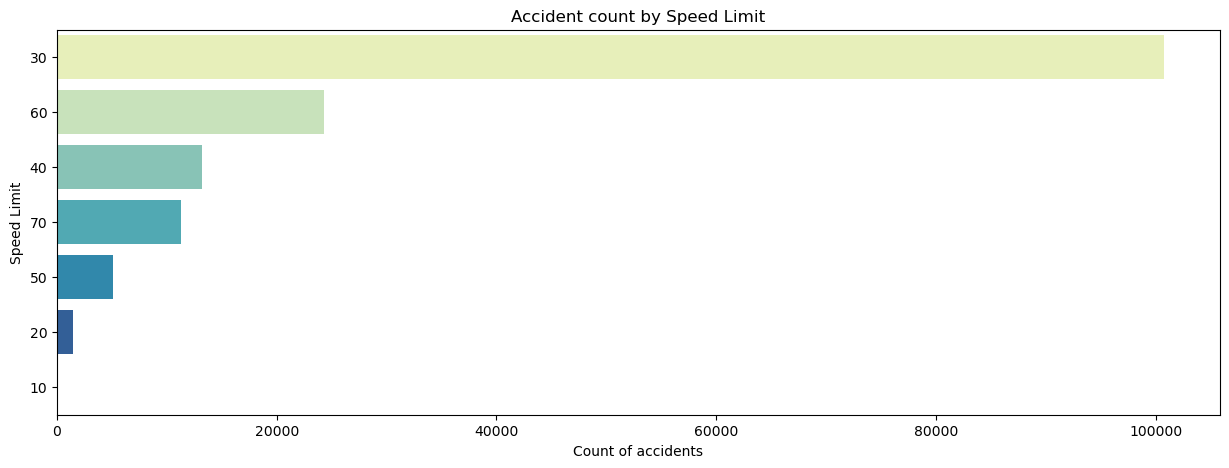

In [14]:
plt.figure(figsize = (15,5))
sns.countplot(data=df, y='Speed_limit', order=df['Speed_limit'].value_counts().index, palette='YlGnBu')
plt.title('Accident count by Speed Limit')
plt.xlabel('Count of accidents')
plt.ylabel('Speed Limit')

in speed limit column 30 was the speed when most of the accidents are happening

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'T or staggered junction'),
  Text(1, 0, 'Crossroads'),
  Text(2, 0, 'Not at junction or within 20 metres'),
  Text(3, 0, 'Roundabout'),
  Text(4, 0, 'Mini-roundabout'),
  Text(5, 0, 'More than 4 arms (not roundabout)'),
  Text(6, 0, 'Private drive or entrance'),
  Text(7, 0, 'Slip road'),
  Text(8, 0, 'Other junction')])

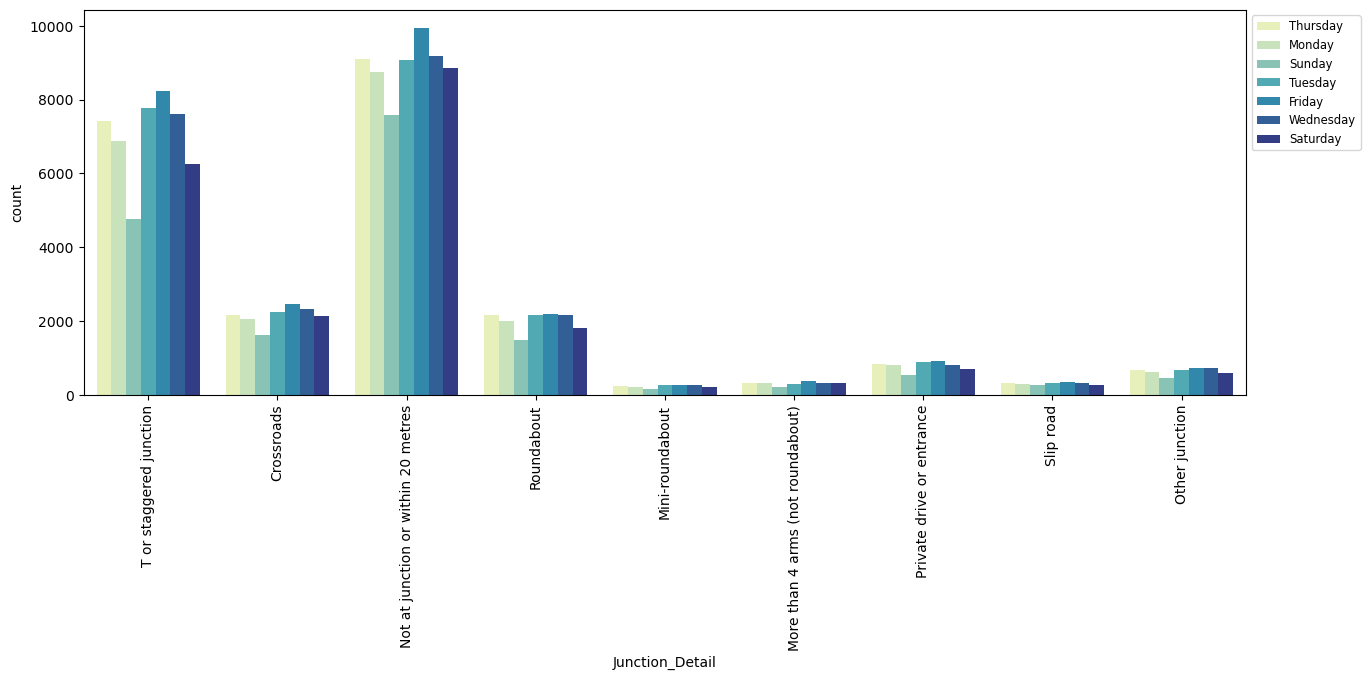

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x= 'Junction_Detail' ,palette="YlGnBu", hue='Day_of_Week')
plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize='small')
plt.xticks(rotation = 90)

lots of accidents are happening if the junction control is "not a junction or within 20 meters" 

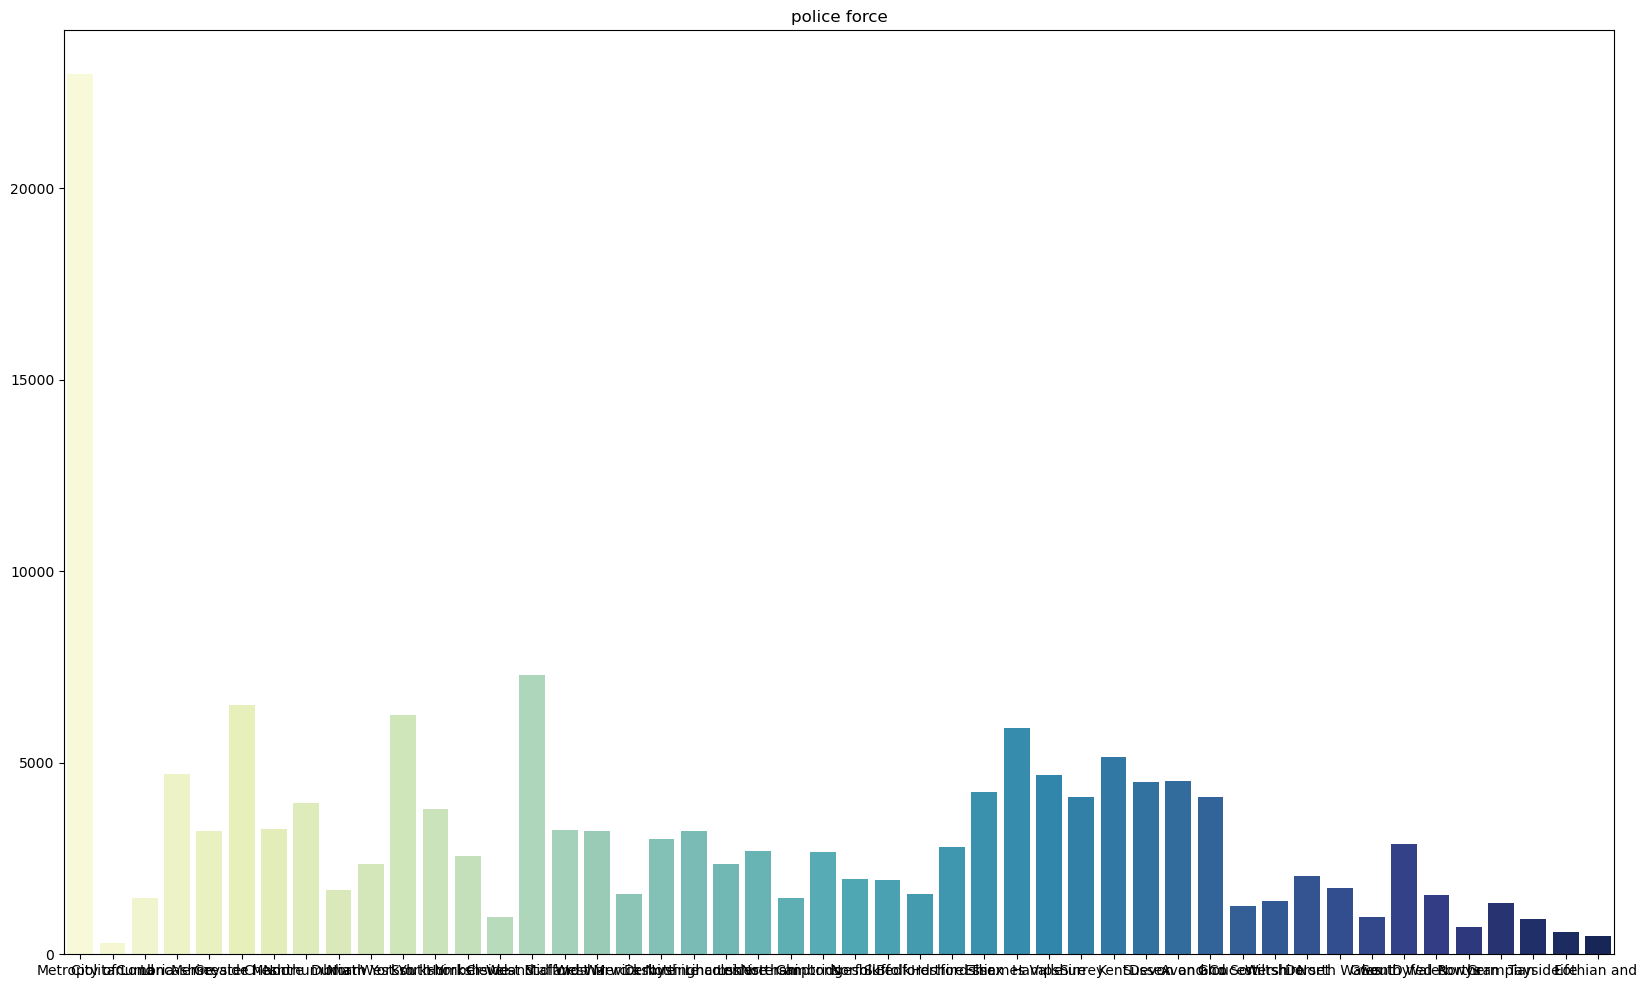

In [16]:
plt.figure(figsize=(20,12))
sns.countplot(data=df,x=df['Police_Force'].str[:12],palette="YlGnBu")
plt.title('police force')
plt.xlabel('')
plt.ylabel('')
plt.show()

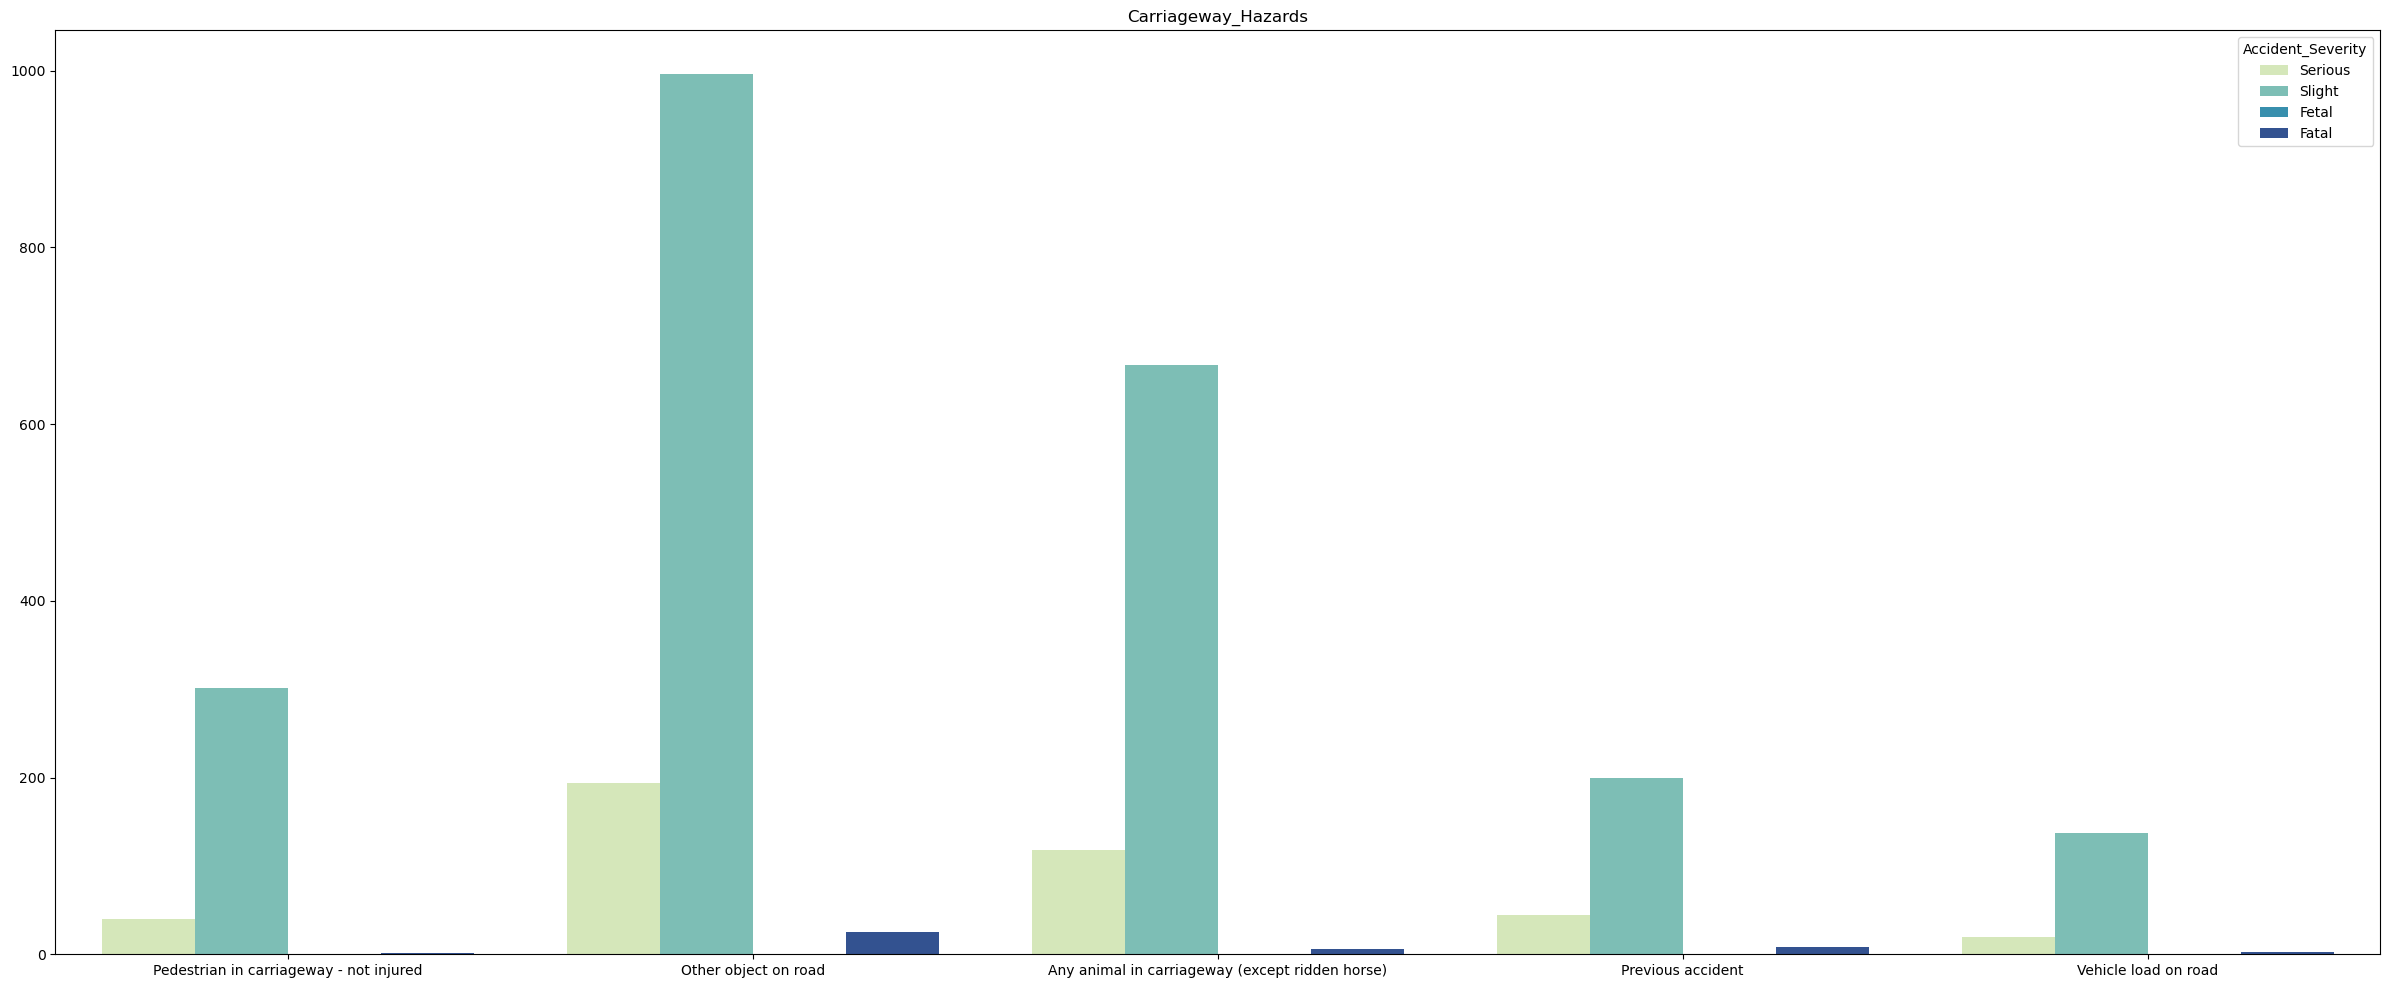

In [17]:
plt.figure(figsize=(30,12))
sns.countplot(data=df,x=df['Carriageway_Hazards'],palette="YlGnBu",hue='Accident_Severity')
plt.title('Carriageway_Hazards')
plt.xlabel('')
plt.ylabel('')
plt.show()

carriageway hazards was other "object on road" that is effecting accident severities

Text(0, 0.5, 'weather condition')

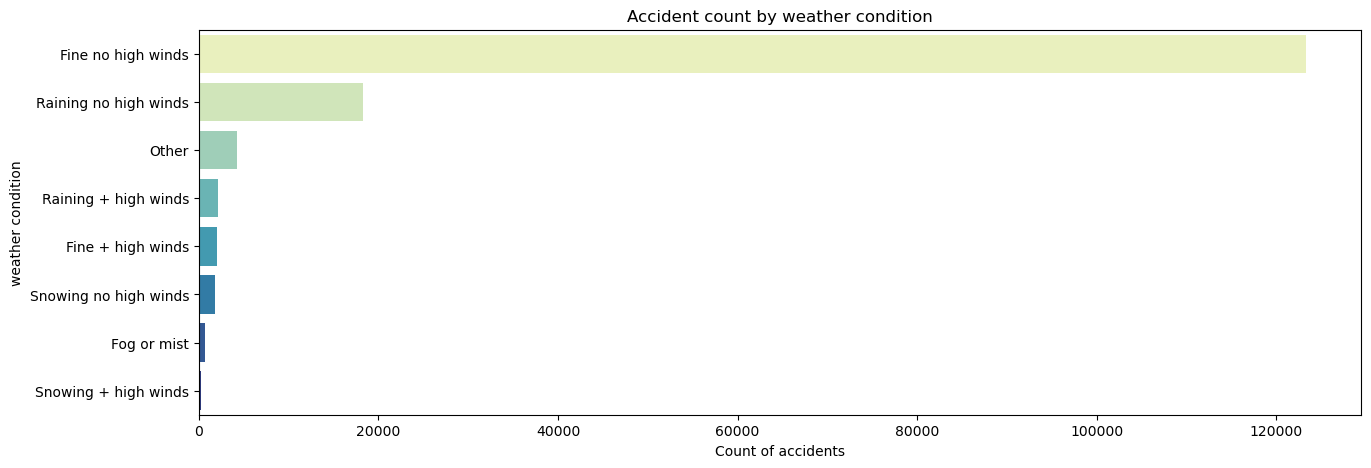

In [18]:
plt.figure(figsize = (15,5))
sns.countplot(data=df, y='Weather_Conditions',order=df['Weather_Conditions'].value_counts().index, palette='YlGnBu')
plt.title('Accident count by weather condition')
plt.xlabel('Count of accidents')
plt.ylabel('weather condition')

weather condition was fine when most of the accidents was happening

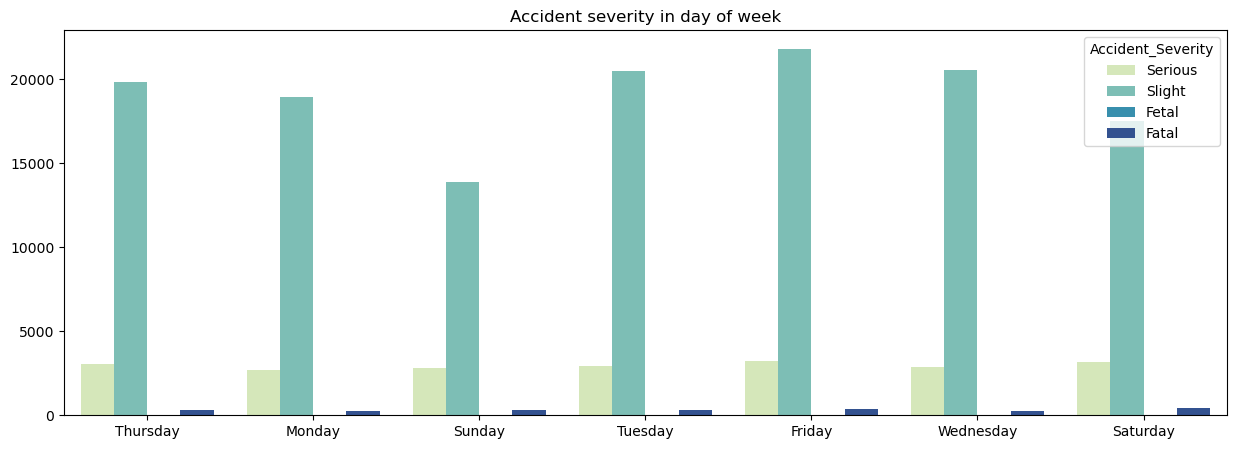

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x=df['Day_of_Week'],palette="YlGnBu",hue='Accident_Severity')
plt.title('Accident severity in day of week')
plt.xlabel('')
plt.ylabel('')
plt.show()

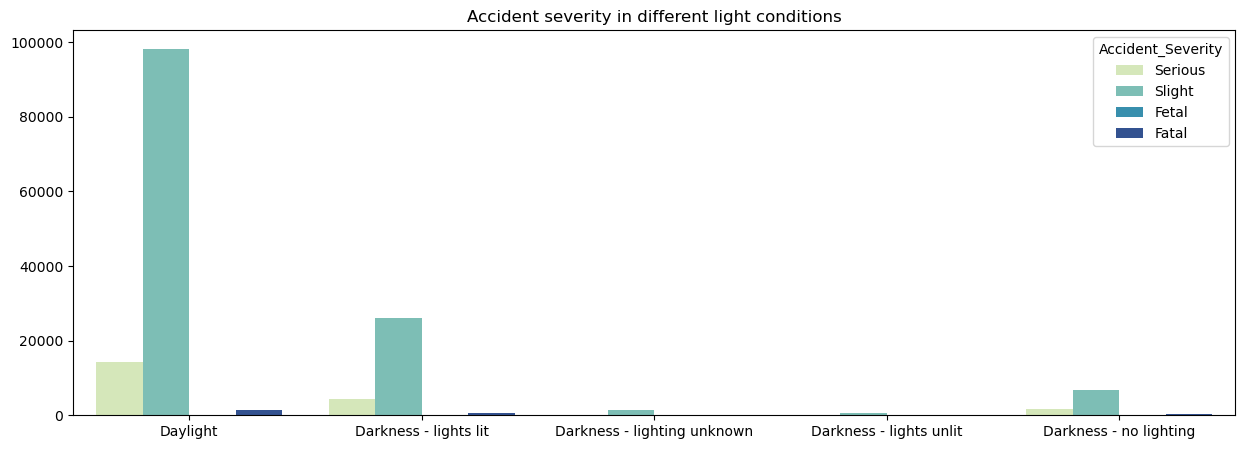

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x=df['Light_Conditions'],palette="YlGnBu",hue='Accident_Severity')
plt.title('Accident severity in different light conditions')
plt.xlabel('')
plt.ylabel('')
plt.show()

light condition was normal in majority accidents

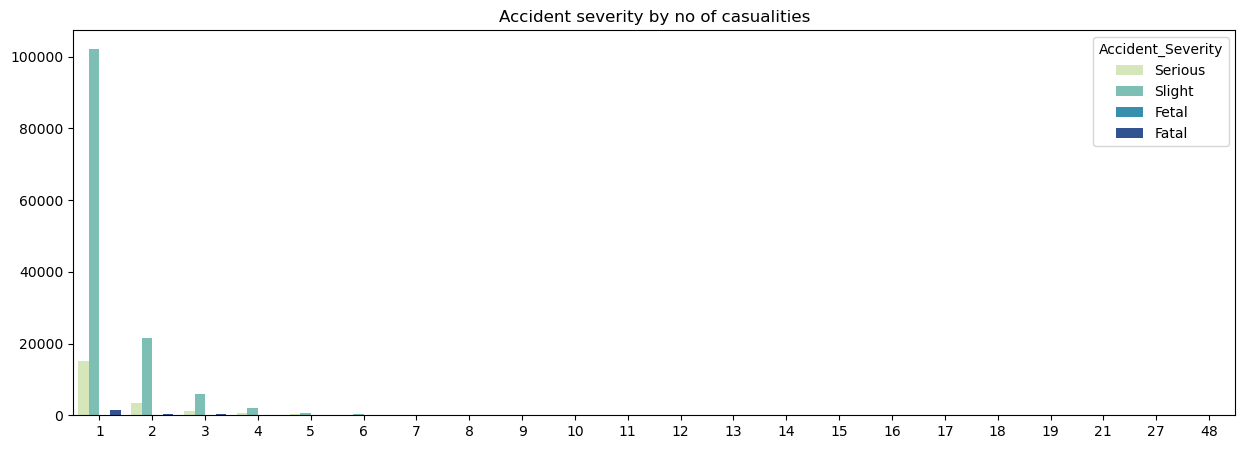

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x=df['Number_of_Casualties'],palette="YlGnBu",hue='Accident_Severity')
plt.title('Accident severity by no of casualities')
plt.xlabel('')
plt.ylabel('')
plt.show()

number of casualities are 1 or 2 most of the time

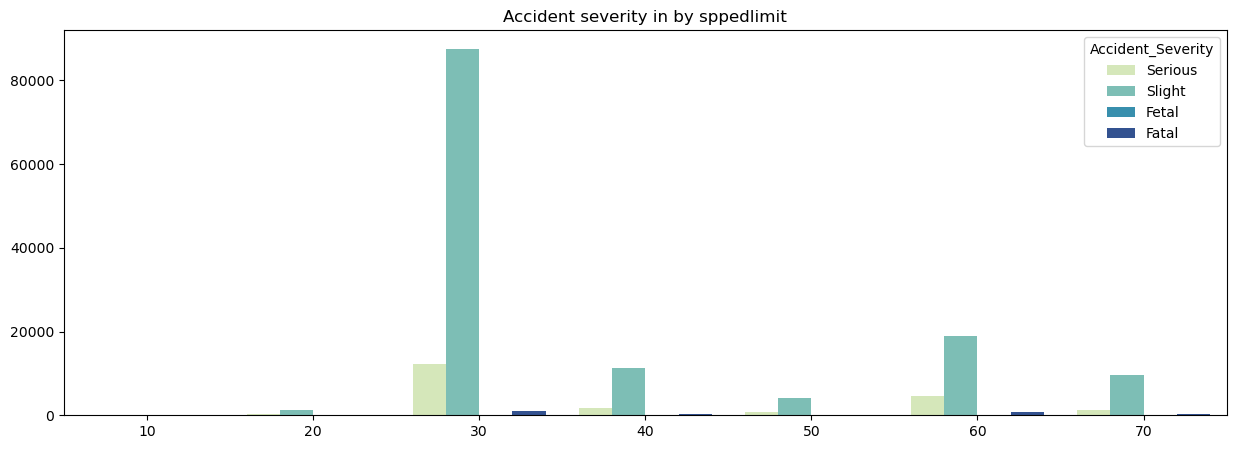

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x=df['Speed_limit'],palette="YlGnBu",hue='Accident_Severity')
plt.title('Accident severity in by sppedlimit')
plt.xlabel('')
plt.ylabel('')
plt.show()

Latitude                   Axes(0.125,0.653529;0.227941x0.226471)
Longitude               Axes(0.398529,0.653529;0.227941x0.226471)
Number_of_Casualties    Axes(0.672059,0.653529;0.227941x0.226471)
Number_of_Vehicles         Axes(0.125,0.381765;0.227941x0.226471)
Speed_limit             Axes(0.398529,0.381765;0.227941x0.226471)
dtype: object

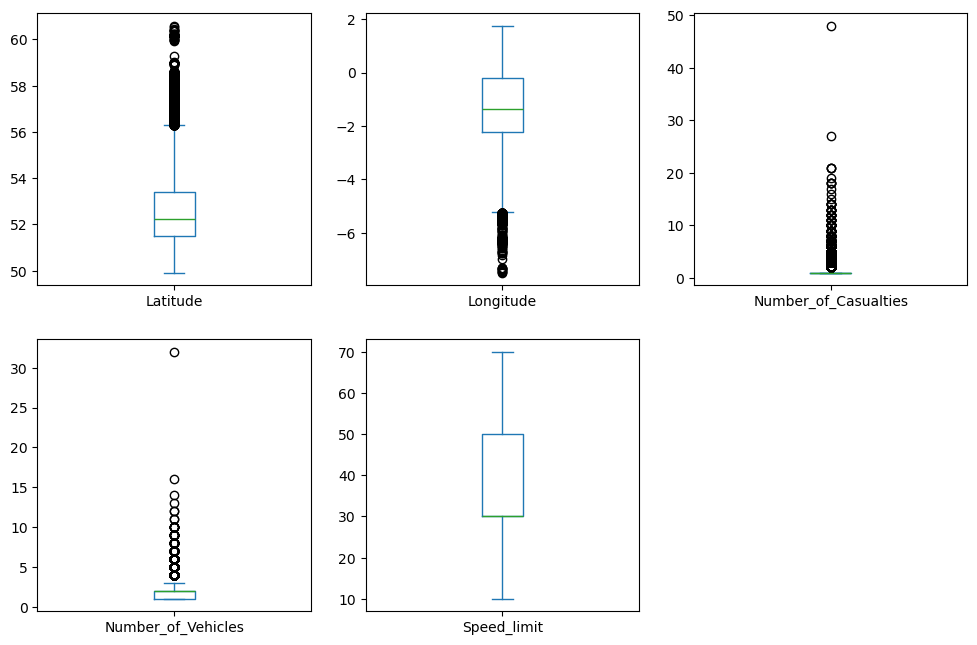

In [23]:
df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True)

# Data Preprocessing

In [24]:
df['Road_Surface_Conditions']=df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0])
df['Road_Type']=df['Road_Type'].fillna(df['Road_Type'].mode()[0])
df['Weather_Conditions']=df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0])
df['Time']=df['Time'].fillna(df['Time'].mode()[0])
df.isna().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           153287
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions            0
Road_Type                          0
Speed_limit                        0
Time                               0
Urban_or_Rural_Area                0
Weather_Conditions                 0
Vehicle_Type                       0
dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Junction_Control', 'Junction_Detail', 'Light_Conditions',
                     'Road_Surface_Conditions', 'Urban_or_Rural_Area',
                    'Weather_Conditions', 'Vehicle_Type', 'Road_Type']
lab = LabelEncoder()
for col in columns_to_encode:
    df[col] = lab.fit_transform(df[col])

df.dtypes

Accident_Index                 object
Accident Date                  object
Day_of_Week                    object
Junction_Control                int32
Junction_Detail                 int32
Accident_Severity              object
Latitude                      float64
Light_Conditions                int32
Local_Authority_(District)     object
Carriageway_Hazards            object
Longitude                     float64
Number_of_Casualties            int64
Number_of_Vehicles              int64
Police_Force                   object
Road_Surface_Conditions         int32
Road_Type                       int32
Speed_limit                     int64
Time                           object
Urban_or_Rural_Area             int32
Weather_Conditions              int32
Vehicle_Type                    int32
dtype: object

In [26]:
df.drop(['Accident_Index','Accident Date','Day_of_Week','Local_Authority_(District)','Carriageway_Hazards','Police_Force',
       'Time',],axis=1,inplace=True)
df

,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,4,8,Serious,51.512273,4,-0.201349,1,2,0,1,30,1,1,2
1,4,0,Serious,51.514399,4,-0.199248,11,2,4,3,30,1,1,13
2,4,8,Slight,51.486668,4,-0.179599,1,2,0,3,30,1,1,13
3,2,8,Serious,51.507804,4,-0.203110,1,2,2,3,30,1,3,9
4,2,0,Serious,51.482076,1,-0.173445,1,2,0,3,30,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156041,4,5,Serious,55.957623,4,-3.123851,1,2,0,3,30,1,1,2
156042,3,3,Slight,55.976706,1,-3.242031,1,1,0,3,30,1,1,14
156043,4,6,Slight,55.934346,1,-3.451024,1,2,4,3,50,1,4,2
156044,4,8,Slight,55.843925,0,-3.193714,2,2,0,3,40,0,1,2


#Handling outlayers

In [27]:
def remove_outliers_iqr(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    # Calculate the third quartile
    q3 = dataframe[column].quantile(0.75)
    # Calculate the IQR
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    # Calculate the upper bound
    upper_bound = q3 + 1.5 * iqr
    # Return the dataframe with outliers removed
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

In [28]:
columns = ['Number_of_Casualties','Number_of_Vehicles','Latitude','Longitude']
for i in columns:
   dfe=remove_outliers_iqr(df,i)
   print("\nDataset info after removing outliers:")
   print(dfe.info())


Dataset info after removing outliers:
<class 'pandas.core.frame.DataFrame'>
Index: 118737 entries, 0 to 156045
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Junction_Control         118737 non-null  int32  
 1   Junction_Detail          118737 non-null  int32  
 2   Accident_Severity        118737 non-null  object 
 3   Latitude                 118737 non-null  float64
 4   Light_Conditions         118737 non-null  int32  
 5   Longitude                118737 non-null  float64
 6   Number_of_Casualties     118737 non-null  int64  
 7   Number_of_Vehicles       118737 non-null  int64  
 8   Road_Surface_Conditions  118737 non-null  int32  
 9   Road_Type                118737 non-null  int32  
 10  Speed_limit              118737 non-null  int64  
 11  Urban_or_Rural_Area      118737 non-null  int32  
 12  Weather_Conditions       118737 non-null  int32  
 13  Vehicle_Type             

In [29]:
x=dfe.drop(['Accident_Severity'],axis=1)
x

,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,4,8,51.512273,4,-0.201349,1,2,0,1,30,1,1,2
1,4,0,51.514399,4,-0.199248,11,2,4,3,30,1,1,13
2,4,8,51.486668,4,-0.179599,1,2,0,3,30,1,1,13
3,2,8,51.507804,4,-0.203110,1,2,2,3,30,1,3,9
4,2,0,51.482076,1,-0.173445,1,2,0,3,30,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156041,4,5,55.957623,4,-3.123851,1,2,0,3,30,1,1,2
156042,3,3,55.976706,1,-3.242031,1,1,0,3,30,1,1,14
156043,4,6,55.934346,1,-3.451024,1,2,4,3,50,1,4,2
156044,4,8,55.843925,0,-3.193714,2,2,0,3,40,0,1,2


In [30]:
y=dfe['Accident_Severity']
y

0         Serious
1         Serious
2          Slight
3         Serious
4         Serious
           ...   
156041    Serious
156042     Slight
156043     Slight
156044     Slight
156045     Slight
Name: Accident_Severity, Length: 155633, dtype: object

In [31]:
os_train=x.copy()
us_train=x.copy()

In [32]:
os_tar=y.copy()
us_tar=y.copy()

In [33]:
oss_train=x.copy()
oss_tar=y.copy()

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
129715,2,4,51.102206,4,-0.190317,1,3,0,3,30,1,1,2
32845,2,8,53.474406,1,-2.251876,1,2,0,3,30,1,1,3
115948,4,8,50.826453,4,-1.701949,2,2,0,3,30,0,1,2
53516,4,8,53.796729,4,-1.585810,1,2,0,3,20,1,1,2
127803,5,3,50.837302,4,-0.124599,1,2,0,1,30,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,3,3,51.370784,4,-0.492089,1,1,0,3,30,1,1,2
103694,4,5,51.670743,4,0.683267,1,3,0,3,40,0,1,2
132234,5,3,50.594677,4,-4.521750,2,1,0,0,70,0,1,2
147169,4,8,51.651652,4,-3.019888,1,2,0,3,30,1,1,14


#Model creation

In [ ]:
nb = GaussianNB()

rf = RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=83,
                       random_state=0)

ad = AdaBoostClassifier(random_state = 1)

knn = KNeighborsClassifier(n_neighbors=4)

dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

accuracy_value = []

model1 = [nb,rf,ad,knn,dt]

for x in model1:

    print('********',x,'***********')

    x.fit(x_train,y_train)

    y_pred = x.predict(x_test)

    print(classification_report(y_test,y_pred))

    print('Accuracy_score : ',accuracy_score(y_test,y_pred)*100)

    accuracy_value.append(accuracy_score(y_test,y_pred)* 100)

# oversampling using SMOTE(syntetic minority oversampling technique)

In [63]:
x1=dfe.drop(['Accident_Severity'],axis=1)
x1

,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,4,8,51.512273,4,-0.201349,1,2,0,1,30,1,1,2
1,4,0,51.514399,4,-0.199248,11,2,4,3,30,1,1,13
2,4,8,51.486668,4,-0.179599,1,2,0,3,30,1,1,13
3,2,8,51.507804,4,-0.203110,1,2,2,3,30,1,3,9
4,2,0,51.482076,1,-0.173445,1,2,0,3,30,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156041,4,5,55.957623,4,-3.123851,1,2,0,3,30,1,1,2
156042,3,3,55.976706,1,-3.242031,1,1,0,3,30,1,1,14
156043,4,6,55.934346,1,-3.451024,1,2,4,3,50,1,4,2
156044,4,8,55.843925,0,-3.193714,2,2,0,3,40,0,1,2


In [64]:
y1=dfe['Accident_Severity']
y1

0         Serious
1         Serious
2          Slight
3         Serious
4         Serious
           ...   
156041    Serious
156042     Slight
156043     Slight
156044     Slight
156045     Slight
Name: Accident_Severity, Length: 155633, dtype: object

In [65]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=1)

x_os, y_os = oversample.fit_resample(x1,y1)

In [66]:
y_os.value_counts()

Accident_Severity
Serious    132637
Slight     132637
Fetal      132637
Fatal      132637
Name: count, dtype: int64

In [67]:
scaleros=MinMaxScaler()

scaleros.fit(x_os)

x_os = scaleros.transform(x_os)

x_os

array([[0.66666667, 1.        , 0.14305868, ..., 1.        , 0.14285714,
        0.14285714],
       [0.66666667, 0.        , 0.1432592 , ..., 1.        , 0.14285714,
        0.92857143],
       [0.66666667, 1.        , 0.1406437 , ..., 1.        , 0.14285714,
        0.92857143],
       ...,
       [0.66666667, 1.        , 0.08446255, ..., 1.        , 0.71428571,
        0.14285714],
       [0.5       , 0.375     , 0.14468254, ..., 0.        , 0.14285714,
        0.14285714],
       [0.66666667, 0.875     , 0.39411586, ..., 0.        , 0.14285714,
        0.57142857]])

In [68]:
train_x_os,test_x_os,train_y_os,test_y_os = train_test_split(x_os,y_os,test_size=0.3,random_state=1)

Normalization

In [69]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(train_x_os,train_y_os)
train_x_os=scalar.transform(train_x_os)
test_x_os=scalar.transform(test_x_os)
train_x_os

array([[ 0.72706059,  1.29134024, -0.62450115, ...,  0.74396322,
        -0.41330077, -0.38946237],
       [-1.61770004, -1.5613946 ,  0.15114074, ...,  0.74396322,
        -0.41330077, -0.38946237],
       [ 1.89944091, -0.49161904,  1.03544373, ..., -1.34415247,
         2.50272202, -0.38946237],
       ...,
       [ 0.72706059,  1.29134024,  1.2572154 , ...,  0.74396322,
        -0.41330077, -0.38946237],
       [-0.44531972, -0.49161904, -0.52832332, ...,  0.74396322,
        -0.41330077, -0.38946237],
       [ 0.72706059,  1.29134024, -0.90541613, ...,  0.74396322,
        -0.41330077, -0.38946237]])

In [70]:

nbos = GaussianNB()

rfos = RandomForestClassifier()

ados = AdaBoostClassifier(random_state=1)

knnos = KNeighborsClassifier(n_neighbors=7)

dtos = DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=42)

model2 = [nbos,rfos,ados,knnos,dtos]

accuracy_valueos = []

for i in model2:

    print('********',i,'**********')

    i.fit(train_x_os,train_y_os)

    y_pred_os = i.predict(test_x_os)

    print(classification_report(test_y_os,y_pred_os))

    print("Accuracy score:",accuracy_score(test_y_os,y_pred_os) * 100)

    accuracy_valueos.append(accuracy_score(test_y_os,y_pred_os) * 100)

******** GaussianNB() **********
              precision    recall  f1-score   support

       Fatal       0.49      0.47      0.48     39985
       Fetal       0.76      1.00      0.87     40138
     Serious       0.41      0.33      0.36     39378
      Slight       0.53      0.49      0.51     39664

    accuracy                           0.57    159165
   macro avg       0.55      0.57      0.56    159165
weighted avg       0.55      0.57      0.56    159165

Accuracy score: 57.35117645210944
******** RandomForestClassifier() **********
              precision    recall  f1-score   support

       Fatal       0.90      0.95      0.93     39985
       Fetal       1.00      1.00      1.00     40138
     Serious       0.78      0.79      0.78     39378
      Slight       0.80      0.74      0.77     39664

    accuracy                           0.87    159165
   macro avg       0.87      0.87      0.87    159165
weighted avg       0.87      0.87      0.87    159165

Accuracy score: 87

d:\Anacondas\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anacondas\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anacondas\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Fatal       0.44      0.50      0.47     39985
       Fetal       0.74      1.00      0.85     40138
     Serious       0.00      0.00      0.00     39378
      Slight       0.43      0.64      0.51     39664

    accuracy                           0.54    159165
   macro avg       0.40      0.54      0.46    159165
weighted avg       0.40      0.54      0.46    159165

Accuracy score: 53.73040555398486


In [41]:
dfe.head()

,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,4,8,Serious,51.512273,4,-0.201349,1,2,0,1,30,1,1,2
1,4,0,Serious,51.514399,4,-0.199248,11,2,4,3,30,1,1,13
2,4,8,Slight,51.486668,4,-0.179599,1,2,0,3,30,1,1,13
3,2,8,Serious,51.507804,4,-0.203110,1,2,2,3,30,1,3,9
4,2,0,Serious,51.482076,1,-0.173445,1,2,0,3,30,1,1,2


In [56]:
dfe

,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,4,8,Serious,51.512273,4,-0.201349,1,2,0,1,30,1,1,2
1,4,0,Serious,51.514399,4,-0.199248,11,2,4,3,30,1,1,13
2,4,8,Slight,51.486668,4,-0.179599,1,2,0,3,30,1,1,13
3,2,8,Serious,51.507804,4,-0.203110,1,2,2,3,30,1,3,9
4,2,0,Serious,51.482076,1,-0.173445,1,2,0,3,30,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156041,4,5,Serious,55.957623,4,-3.123851,1,2,0,3,30,1,1,2
156042,3,3,Slight,55.976706,1,-3.242031,1,1,0,3,30,1,1,14
156043,4,6,Slight,55.934346,1,-3.451024,1,2,4,3,50,1,4,2
156044,4,8,Slight,55.843925,0,-3.193714,2,2,0,3,40,0,1,2


In [71]:
randmodel=RandomForestClassifier()
randmodel.fit(train_x_os,train_y_os)
y_pred_os = i.predict(test_x_os)


In [72]:
pred=randmodel.predict(scalar.transform([[3,3,60.786567,0.-4.985643,11,3,2,0,3,40,1,1,2]]))
pred

array(['Slight'], dtype=object)

In [55]:
test_y_os

259998      Fatal
388793      Fetal
45914      Slight
26526      Slight
418549      Fetal
           ...   
274286      Fatal
30049      Slight
514790    Serious
102365     Slight
204259      Fatal
Name: Accident_Severity, Length: 159165, dtype: object

# undersampling

In [45]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=1)
x_us, y_us = undersampler.fit_resample(us_train,us_tar)

y_us.value_counts()

Accident_Severity
Fatal      49
Fetal      49
Serious    49
Slight     49
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import MinMaxScaler

scalerus = MinMaxScaler()

scalerus.fit_transform(x_us)

x_us

,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
108752,4,8,51.807729,4,-1.662596,1,2,0,3,60,0,1,2
98115,3,3,51.967482,4,1.105597,3,2,4,3,60,0,1,2
79601,3,3,52.903393,4,-1.295241,2,2,0,3,40,1,1,2
30137,4,8,53.475034,4,-3.025565,1,2,0,3,30,1,1,2
107658,4,8,51.979183,3,-0.966365,2,3,0,3,60,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,4,5,51.527648,4,-0.022406,1,2,0,3,30,1,1,2
100927,4,8,51.625085,4,-0.396844,1,2,0,3,30,1,1,2
58619,4,4,53.416437,4,-1.254889,1,1,0,0,70,0,1,2
69470,2,0,52.499495,4,-1.952976,3,2,0,3,30,1,1,2


In [47]:
train_x_us ,test_x_us ,train_y_us ,test_y_us = train_test_split(x_us,y_us,test_size=0.3,random_state = 1)

nb = GaussianNB()

rf = RandomForestClassifier(n_estimators=100,random_state = 1)

ad = AdaBoostClassifier(random_state = 1)

knn = KNeighborsClassifier(n_neighbors=4)

dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

models3 = [nb,rf,ad,knn,dt]

accuracy_valueus = []

models3 = [nb,rf,ad,knn,dt]

for model3 in models3:

    print('********', model3, '***********')

    model3.fit(train_x_us, train_y_us)

    y_pred_us = model3.predict(test_x_us)  # Corrected line

    print(classification_report(test_y_us, y_pred_us))  # Corrected line

    print('Accuracy_score : ', accuracy_score(test_y_us, y_pred_us) * 100)  # Corrected line

    accuracy_valueus.append(accuracy_score(test_y_us, y_pred_us) * 100)  # Corrected line

******** GaussianNB() ***********
              precision    recall  f1-score   support

       Fatal       0.71      0.62      0.67        16
       Fetal       0.60      1.00      0.75        12
     Serious       0.56      0.31      0.40        16
      Slight       0.38      0.40      0.39        15

    accuracy                           0.56        59
   macro avg       0.56      0.58      0.55        59
weighted avg       0.56      0.56      0.54        59

Accuracy_score :  55.932203389830505
******** RandomForestClassifier(random_state=1) ***********
              precision    recall  f1-score   support

       Fatal       0.64      0.56      0.60        16
       Fetal       0.73      0.92      0.81        12
     Serious       0.39      0.44      0.41        16
      Slight       0.33      0.27      0.30        15

    accuracy                           0.53        59
   macro avg       0.52      0.55      0.53        59
weighted avg       0.51      0.53      0.52        59


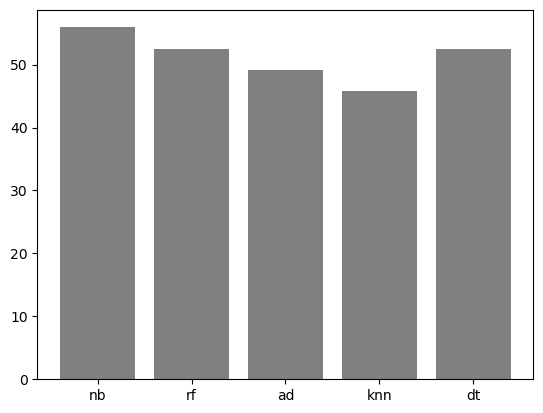

In [48]:
x3 = ['nb','rf','ad','knn','dt']

y3 = accuracy_valueus

plt.bar(x3,y3,color='grey')

plt.show()

Hyper parameter Tuning

from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import numpy as np

# Generate synthetic data
train_x_os, train_y_os = make_classification(n_samples=1000, random_state=0)

# Define parameter grid for Grid Search
param_grid_grid_search = {'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'n_estimators': [50, 100, 200]}

# Define parameter distributions for Random Search
param_distributions_random_search = {'max_depth': [3, 5, 10, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                                     'n_estimators': np.linspace(50, 200, 10, dtype=int)}

# Create base RandomForestClassifier
base_estimator = RandomForestClassifier(random_state=0)

# Perform Grid Search
grid_search = GridSearchCV(base_estimator, param_grid_grid_search, cv=5)

grid_search.fit(train_x_os, train_y_os)

best_params_grid_search = grid_search.best_params_                                                                        

# Perform Random Search
random_search = RandomizedSearchCV(base_estimator, param_distributions_random_search, n_iter=50, cv=5, random_state=0)

random_search.fit(train_x_os, train_y_os)

best_params_random_search = random_search.best_params_

print("Best parameters found by Grid Search:", best_params_grid_search)

print("Best parameters found by Random Search:", best_params_random_search)

best_model = random_search.best_estimator_

best_model

rf1 = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=2,
    n_estimators=83,
    min_samples_split=2)
rf1.fit(train_x_os,train_y_os)

pred = rf1.predict(test_x_os)

pred


# Calculate accuracy
accuracy = accuracy_score(test_y_os, pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(test_y_os,pred)
print("Classification Report:")
print(class_report)


k_model=KNeighborsClassifier(n_neighbors=7)
n_model=GaussianNB()
#s_model=SVC()
r_model=RandomForestClassifier()
d_model=DecisionTreeClassifier(criterion="entropy")
lst_model=[k_model,n_model,r_model,d_model]

for i in lst_model:
  print('model is',i)
  i.fit(x_train ,y_train)
  y_pred = i.predict(x_test)
  print("*"*1000)
  print(confusion_matrix(y_test,y_pred))
  print("Accuracy score is",accuracy_score(y_test,y_pred))
  print(".......classification Report........")
  print(classification_report(y_test,y_pred))

df_new = df[df.columns.difference(['Longitude','Latitude'])]

df_new

selector = SelectKBest(score_func=chi2, k=10)  # Select top 5 features
x_train_selected = selector.fit_transform(x_train,y_train)
x_test_selected = selector.transform(test_x_os)
# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
# Print the selected feature names
selected_features =df_new.columns[selected_indices]
print("Selected Features:", selected_features)

clf = RandomForestClassifier()
clf.fit(x_train_selected, train_y_os)
y_pred = clf.predict(x_test_selected)
# Evaluate the model
accuracy = accuracy_score(test_y_os, y_pred)
print("Accuracy:", accuracy)

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x, y)
feature_importances = rf_classifier.feature_importances_
feature_imp = pd.Series(feature_importances, index=x.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_imp)

sns.barplot(x=feature_imp,y=feature_imp.index,palette="YlGnBu")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feartures")
plt.title("important feartues")

#successful implimentation of this model will provide valuable insights for policymakers,traffic managements and emergency services also